In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.python.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def read_text(file_name):
  with open(file_name, "r") as f:
    return f.read().replace("\n", " ")

In [0]:
train_text = []
train_text.append(read_text("/content/drive/My Drive/Тексты писателей/(О. Генри) Обучающая_50 вместе.txt"))
train_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Стругацкие) Обучающая_5 вместе.txt"))
train_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Булгаков) Обучающая_5 вместе.txt"))
train_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Клиффорд_Саймак) Обучающая_5 вместе.txt"))
train_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Рэй Брэдберри) Обучающая_22 вместе.txt"))
train_text.append(read_text('/content/drive/My Drive/Тексты писателей/(Макс Фрай) Обучающая_5 вместе.txt'))

In [0]:

class_name = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
class_count = len(class_name)

In [0]:
test_text = []
test_text.append(read_text("/content/drive/My Drive/Тексты писателей/(О. Генри) Тестовая_20 вместе.txt"))
test_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Стругацкие) Тестовая_2 вместе.txt"))
test_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Булгаков) Тестовая_2 вместе.txt"))
test_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Клиффорд_Саймак) Тестовая_2 вместе.txt"))
test_text.append(read_text("/content/drive/My Drive/Тексты писателей/(Рэй Брэдберри) Тестовая_8 вместе.txt"))
test_text.append(read_text('/content/drive/My Drive/Тексты писателей/(Макс Фрай) Тестовая_2 вместе.txt'))

In [0]:
max_word_count = 20000

In [0]:

def get_train_test(max_word_count):
  tokenizer = Tokenizer(num_words=max_word_count, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', split=" ", lower=True, oov_token="unknown", char_level=False)
  tokenizer.fit_on_texts(train_text)
  items = list(tokenizer.word_index.items())
  train_word_indexes = tokenizer.texts_to_sequences(train_text)
  test_word_indexes = tokenizer.texts_to_sequences(test_text)
  return train_word_indexes, test_word_indexes, tokenizer



In [0]:
def get_set_from_indexes(word_indexes, x_len, step):
  x_sample = []
  word_len = len(word_indexes)
  index = 0

  while (index + x_len <= word_len):
    x_sample.append(word_indexes[index:index+x_len])
    index += step
  return x_sample

In [0]:
def create_multi_class(word_indexes, x_len, step):
  n_classes = len(word_indexes)
  classes_x_samples = []
  for wi in word_indexes:
    classes_x_samples.append(get_set_from_indexes(wi, x_len, step))
  
  x_sample = []
  y_sample = []

  for t in range(n_classes):
    xt = classes_x_samples[t]
    for i in range(len(xt)):
      x_sample.append(xt[i])

    curr_y = utils.to_categorical(t, n_classes)

    for i in range(len(xt)):
      y_sample.append(curr_y)


  x_sample = np.array(x_sample)
  y_sample = np.array(y_sample)

  
  return (x_sample, y_sample) 

In [0]:
x_len = 1000
step = 100

In [0]:
train_word_indexes, test_word_indexes = get_train_test(max_word_count)
x_train, y_train = create_multi_class(train_word_indexes, x_len, step)
x_test, y_test = create_multi_class(test_word_indexes, x_len, step)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17658, 1000)
(17658, 6)
(6693, 1000)
(6693, 6)


In [0]:
x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())
print(x_train_01.shape)
print(x_train_01[0][:100])

In [0]:
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=max_word_count, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


history = model01.fit(x_train_01, 
                      y_train, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(x_test_01, y_test))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
def create_test_multi_class(word_indexes, x_len, step):
  n_classes = len(word_indexes)
  x_test6classes_01 = []
  x_test6classes = []
  for wi in word_indexes:
    sample = (get_set_from_indexes(wi, x_len, step))
    x_test6classes.append(np.array(sample))
    x_test6classes_01.append(tokenizer.sequences_to_matrix(sample))
  x_test6classes_01 = np.array(x_test6classes_01)
  return (x_test6classes, x_test6classes_01)

In [0]:
def recognize_multi_class(model, x_test):
  val = []
  pred = []
  total_sum_rec = []
  n_classes = len(x_test)

  for i in range(n_classes):
    curr_pred = model.predict(x_test[i])
    pred.append(curr_pred)

    curr_out = np.argmax(curr_pred, axis=1)

    ev_val = []
    sum_rec = []
    for j in range(n_classes):
      sum_rec.append(0)
      for t in range(len(curr_out)):
        if (curr_out[t] == j):
          sum_rec[j] += 1
      ev_val.append(sum_rec[j] / len(curr_out))
    total_sum_rec.append(sum_rec[i])
    val.append(ev_val[i])
    recognized_class = np.argmax(ev_val)

    is_rec = " Распознано верно" if recognized_class == i else "Распознано неверно"
    print( class_name[i], " распознано ", int(100*ev_val[i]), "% сеть считает, что это ", class_name[recognized_class], ", ", is_rec, sep='')

  sum_count = sum(len(x_test_i) for x_test_i in x_test) 
  sum_val = sum(total_sum_rec)
  
  
  print("Средний процент распознавания ", int(100*sum_val/sum_count), "%", sep='')

In [0]:
x_test6classes, x_test6classes01 = create_test_multi_class(test_word_indexes, x_len, step)

In [0]:
pred = recognize_multi_class(model01, x_test6classes01)

In [0]:
bows = [100, 500, 1000, 5000, 10000, 50000]

In [0]:
def create_net(batches):
  model = Sequential()
  for b in batches:
    model.add(b)
  return model

In [0]:
model = create_net([
                    BatchNormalization(),
                    Dense(200, input_dim=max_word_count, activation="relu"),
                    Dropout(0.25),
                    BatchNormalization(),
                    Dense(6, activation='sigmoid'),
                    ])

In [0]:
def test_nets(wc, model):
    train_word_indexes, test_word_indexes, tokenizer = get_train_test(wc)
    
    x_train, y_train = create_multi_class(train_word_indexes, x_len, step)
    x_test, y_test = create_multi_class(test_word_indexes, x_len, step)

    x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
    x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

    model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


    history = model.fit(x_train_01, 
                      y_train, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(x_test_01, y_test))

    plt.plot(history.history['acc'], 
            label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_acc'], 
            label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 1s 73us/sample - loss: 1.2833 - acc: 0.5688 - val_loss: 1.6478 - val_acc: 0.3956
Epoch 2/20
17658/17658 [==============================] - 1s 43us/sample - loss: 0.8974 - acc: 0.6938 - val_loss: 1.3909 - val_acc: 0.4969
Epoch 3/20
17658/17658 [==============================] - 1s 42us/sample - loss: 0.6788 - acc: 0.7446 - val_loss: 1.3652 - val_acc: 0.5307
Epoch 4/20
17658/17658 [==============================] - 1s 43us/sample - loss: 0.5467 - acc: 0.7923 - val_loss: 1.4616 - val_acc: 0.5244
Epoch 5/20
17658/17658 [==============================] - 1s 40us/sample - loss: 0.4443 - acc: 0.8366 - val_loss: 1.5502 - val_acc: 0.5146
Epoch 6/20
17658/17658 [==============================] - 1s 40us/sample - loss: 

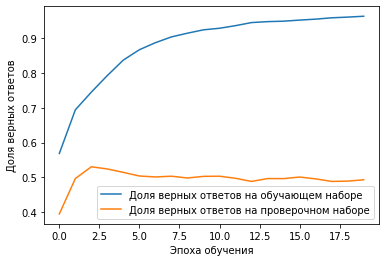

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 2s 90us/sample - loss: 0.8563 - acc: 0.8630 - val_loss: 1.1906 - val_acc: 0.5696
Epoch 2/20
17658/17658 [==============================] - 1s 70us/sample - loss: 0.2109 - acc: 0.9459 - val_loss: 0.7984 - val_acc: 0.7060
Epoch 3/20
17658/17658 [==============================] - 1s 69us/sample - loss: 0.0686 - acc: 0.9810 - val_loss: 0.7728 - val_acc: 0.7384
Epoch 4/20
17658/17658 [==============================] - 1s 71us/sample - loss: 0.0171 - acc: 0.9992 - val_loss: 0.7952 - val_acc: 0.7424
Epoch 5/20
17658/17658 [==============================] - 1s 70us/sample - loss: 0.0062 - acc: 0.9997 - val_loss: 0.7772 - val_acc: 0.7536
Epoch 6/20
17658/17658 [==============================] - 1s 71us/sample - loss: 0.0039 - acc: 0.9998 - val_loss: 0.7690 - val_acc: 0.7596
Epoch 7/20
17658/17658 [==============================] - 1s 73us/sample - loss: 0.0030 - acc: 0.9999 - val_loss: 0.7

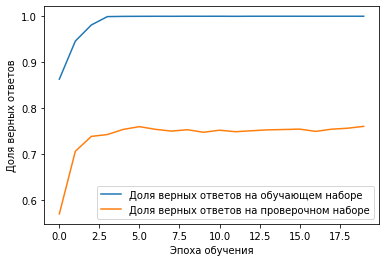

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 2s 120us/sample - loss: 0.7066 - acc: 0.9067 - val_loss: 1.1240 - val_acc: 0.6166
Epoch 2/20
17658/17658 [==============================] - 2s 97us/sample - loss: 0.1813 - acc: 0.9369 - val_loss: 0.7201 - val_acc: 0.7376
Epoch 3/20
17658/17658 [==============================] - 2s 100us/sample - loss: 0.0654 - acc: 0.9521 - val_loss: 0.6308 - val_acc: 0.7825
Epoch 4/20
17658/17658 [==============================] - 2s 100us/sample - loss: 0.0400 - acc: 0.9853 - val_loss: 0.5593 - val_acc: 0.8132
Epoch 5/20
17658/17658 [==============================] - 2s 108us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 0.5568 - val_acc: 0.8144
Epoch 6/20
17658/17658 [==============================] - 2s 100us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 0.5837 - val_acc: 0.8116
Epoch 7/20
17658/17658 [==============================] - 2s 100us/sample - loss: 0.0014 - acc: 0.9999 - val_los

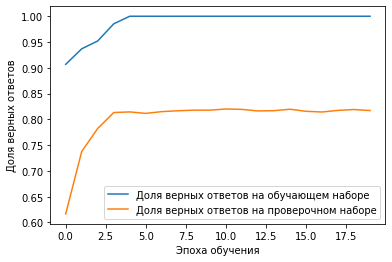

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 6s 337us/sample - loss: 0.4813 - acc: 0.9514 - val_loss: 0.9385 - val_acc: 0.6317
Epoch 2/20
17658/17658 [==============================] - 5s 310us/sample - loss: 0.1057 - acc: 0.9462 - val_loss: 0.6088 - val_acc: 0.7636
Epoch 3/20
17658/17658 [==============================] - 6s 314us/sample - loss: 0.0756 - acc: 0.9446 - val_loss: 0.5633 - val_acc: 0.7875
Epoch 4/20
17658/17658 [==============================] - 6s 313us/sample - loss: 0.0693 - acc: 0.9461 - val_loss: 0.5625 - val_acc: 0.7980
Epoch 5/20
17658/17658 [==============================] - 6s 313us/sample - loss: 0.0662 - acc: 0.9490 - val_loss: 0.5822 - val_acc: 0.8037
Epoch 6/20
17658/17658 [==============================] - 6s 315us/sample - loss: 0.0596 - acc: 0.9606 - val_loss: 0.6704 - val_acc: 0.7881
Epoch 7/20
17658/17658 [==============================] - 5s 295us/sample - loss: 0.0208 - acc: 0.9886 - val_lo

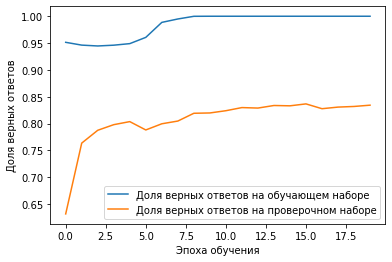

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 11s 615us/sample - loss: 0.4265 - acc: 0.9623 - val_loss: 0.7634 - val_acc: 0.7225
Epoch 2/20
17658/17658 [==============================] - 10s 584us/sample - loss: 0.1198 - acc: 0.9305 - val_loss: 0.5046 - val_acc: 0.8252
Epoch 3/20
17658/17658 [==============================] - 10s 588us/sample - loss: 0.0852 - acc: 0.9295 - val_loss: 0.4945 - val_acc: 0.8379
Epoch 4/20
17658/17658 [==============================] - 10s 595us/sample - loss: 0.0594 - acc: 0.9390 - val_loss: 0.4977 - val_acc: 0.8388
Epoch 5/20
17658/17658 [==============================] - 10s 586us/sample - loss: 0.0491 - acc: 0.9444 - val_loss: 0.4764 - val_acc: 0.8458
Epoch 6/20
17658/17658 [==============================] - 10s 583us/sample - loss: 0.0382 - acc: 0.9622 - val_loss: 0.5243 - val_acc: 0.8365
Epoch 7/20
17658/17658 [==============================] - 10s 584us/sample - loss: 0.0143 - acc: 0.9913 -

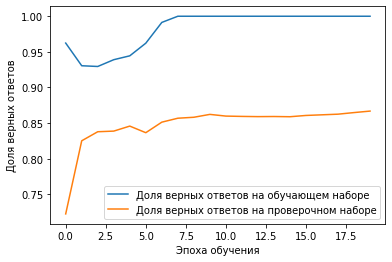

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 53s 3ms/sample - loss: 0.4050 - acc: 0.9688 - val_loss: 1.1053 - val_acc: 0.4284
Epoch 2/20
17658/17658 [==============================] - 52s 3ms/sample - loss: 0.1061 - acc: 0.9572 - val_loss: 0.7491 - val_acc: 0.6728
Epoch 3/20
17658/17658 [==============================] - 49s 3ms/sample - loss: 0.0571 - acc: 0.9664 - val_loss: 0.4363 - val_acc: 0.8306
Epoch 4/20
17658/17658 [==============================] - 51s 3ms/sample - loss: 0.0354 - acc: 0.9725 - val_loss: 0.3501 - val_acc: 0.8661
Epoch 5/20
17658/17658 [==============================] - 51s 3ms/sample - loss: 0.0241 - acc: 0.9830 - val_loss: 0.3707 - val_acc: 0.8615
Epoch 6/20
17658/17658 [==============================] - 50s 3ms/sample - loss: 0.0143 - acc: 0.9916 - val_loss: 0.3365 - val_acc: 0.8767
Epoch 7/20
17658/17658 [==============================] - 52s 3ms/sample - loss: 0.0062 - acc: 0.9982 - val_loss: 0.3

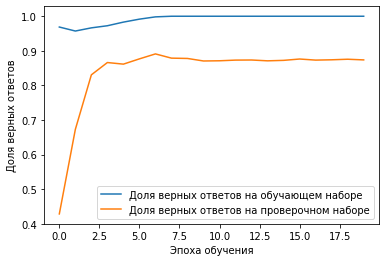

In [28]:
for wc in bows:
  test_nets(wc, model)

In [0]:
maxWordsCount = 20000

In [0]:
train_word_indexes, test_word_indexes, tokenizer = get_train_test(maxWordsCount)
    
x_train, y_train = create_multi_class(train_word_indexes, x_len, step)
x_test, y_test = create_multi_class(test_word_indexes, x_len, step)

x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

In [0]:
model2 = create_net([
                    BatchNormalization(),
                    Dense(200, input_dim=max_word_count, activation="relu"),
                    Dropout(0.25),
                    BatchNormalization(),
                    Dense(200, input_dim=max_word_count, activation="relu"),
                    Dropout(0.25),
                    BatchNormalization(),
                    Dense(200, input_dim=max_word_count, activation="relu"),
                    Dropout(0.25),
                    BatchNormalization(),
                    Dense(6, activation='sigmoid'),
                    ])

In [0]:
model3 = create_net([
                    BatchNormalization(),
                    Dense(1024, input_dim=max_word_count, activation="relu"),
                    Dropout(0.25),
                    BatchNormalization(),
                    Dense(6, activation='sigmoid'),
                    ])

In [0]:
model4 = create_net([
                    BatchNormalization(),
                    Dense(1024, input_dim=max_word_count, activation="linear"),
                    Dropout(0.25),
                    BatchNormalization(),
                    Dense(200, input_dim=max_word_count, activation="linear"),
                    Dropout(0.25),
                    BatchNormalization(),
                    Dense(6, activation='sigmoid'),
                    ])

In [0]:
models = [model2, model3, model4]

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 95s 5ms/sample - loss: 0.2595 - acc: 0.9545 - val_loss: 1.1270 - val_acc: 0.5337
Epoch 2/20
17658/17658 [==============================] - 93s 5ms/sample - loss: 0.0533 - acc: 0.9717 - val_loss: 0.8816 - val_acc: 0.7193
Epoch 3/20
17658/17658 [==============================] - 94s 5ms/sample - loss: 0.0143 - acc: 0.9931 - val_loss: 0.5712 - val_acc: 0.8265
Epoch 4/20
17658/17658 [==============================] - 93s 5ms/sample - loss: 0.0017 - acc: 0.9999 - val_loss: 0.4187 - val_acc: 0.8726
Epoch 5/20
17658/17658 [==============================] - 94s 5ms/sample - loss: 6.0306e-04 - acc: 1.0000 - val_loss: 0.4237 - val_acc: 0.8793
Epoch 6/20
17658/17658 [==============================] - 93s 5ms/sample - loss: 4.0582e-04 - acc: 1.0000 - val_loss: 0.4013 - val_acc: 0.8891
Epoch 7/20
17658/17658 [==============================] - 93s 5ms/sample - loss: 2.9442e-04 - acc: 1.0000 - v

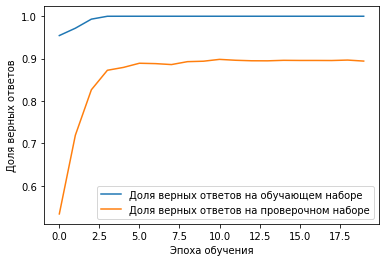

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 92s 5ms/sample - loss: 0.2476 - acc: 0.9737 - val_loss: 0.9206 - val_acc: 0.6480
Epoch 2/20
17658/17658 [==============================] - 92s 5ms/sample - loss: 0.0417 - acc: 0.9896 - val_loss: 0.7683 - val_acc: 0.7491
Epoch 3/20
17658/17658 [==============================] - 92s 5ms/sample - loss: 0.0129 - acc: 0.9954 - val_loss: 0.4718 - val_acc: 0.8413
Epoch 4/20
17658/17658 [==============================] - 92s 5ms/sample - loss: 0.0043 - acc: 0.9990 - val_loss: 0.3904 - val_acc: 0.8803
Epoch 5/20
17658/17658 [==============================] - 92s 5ms/sample - loss: 7.4540e-04 - acc: 1.0000 - val_loss: 0.3902 - val_acc: 0.8884
Epoch 6/20
17658/17658 [==============================] - 92s 5ms/sample - loss: 4.4423e-04 - acc: 1.0000 - val_loss: 0.3994 - val_acc: 0.8884
Epoch 7/20
17658/17658 [==============================] - 91s 5ms/sample - loss: 3.0017e-04 - acc: 1.0000 - v

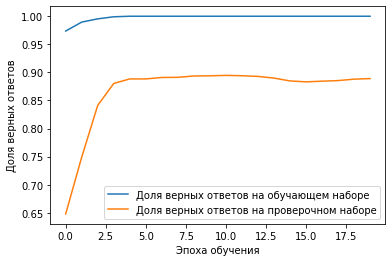

Train on 17658 samples, validate on 6693 samples
Epoch 1/20
17658/17658 [==============================] - 94s 5ms/sample - loss: 0.3710 - acc: 0.9426 - val_loss: 0.9040 - val_acc: 0.6783
Epoch 2/20
17658/17658 [==============================] - 94s 5ms/sample - loss: 0.1512 - acc: 0.9154 - val_loss: 0.6281 - val_acc: 0.7624
Epoch 3/20
17658/17658 [==============================] - 94s 5ms/sample - loss: 0.1141 - acc: 0.9340 - val_loss: 0.5147 - val_acc: 0.8262
Epoch 4/20
17658/17658 [==============================] - 95s 5ms/sample - loss: 0.0545 - acc: 0.9934 - val_loss: 0.3165 - val_acc: 0.9018
Epoch 5/20
17658/17658 [==============================] - 94s 5ms/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3621 - val_acc: 0.8790
Epoch 6/20
17658/17658 [==============================] - 94s 5ms/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3596 - val_acc: 0.8832
Epoch 7/20
17658/17658 [==============================] - 93s 5ms/sample - loss: 8.4839e-04 - acc: 1.0000 - val_loss:

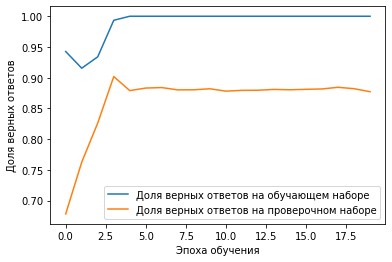

In [43]:
for m in models:
  test_nets(maxWordsCount, m)


Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 6s 342us/sample - loss: 1.6652 - acc: 0.3237 - val_loss: 1.6854 - val_acc: 0.3072
Epoch 2/30
17658/17658 [==============================] - 5s 292us/sample - loss: 1.0310 - acc: 0.6852 - val_loss: 1.7129 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 5s 297us/sample - loss: 0.7689 - acc: 0.6953 - val_loss: 1.7110 - val_acc: 0.3191
Epoch 4/30
17658/17658 [==============================] - 6s 312us/sample - loss: 0.5647 - acc: 0.7271 - val_loss: 1.5946 - val_acc: 0.3538
Epoch 5/30
17658/17658 [==============================] - 6s 323us/sample - loss: 0.4280 - acc: 0.8344 - val_loss: 1.5973 - val_acc: 0.3752
Epoch 6/30
17658/17658 [==============================] - 5s 302us/sample - loss: 0.2702 - acc: 0.9160 - val_loss: 1.6755 - val_acc: 0.3962
Epoch 7/30
17658/17658 [==============================] - 5s 300us/sample - loss: 0.1526 - acc: 0.9440 - val_lo

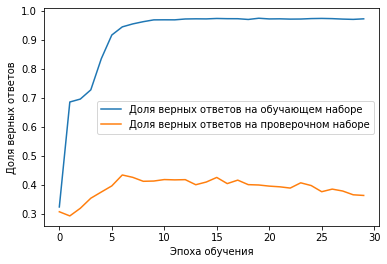

О. Генри распознано 26% сеть считает, что это О. Генри,  Распознано верно
Стругацкие распознано 26% сеть считает, что это Стругацкие,  Распознано верно
Булгаков распознано 22% сеть считает, что это Стругацкие, Распознано неверно
Саймак распознано 27% сеть считает, что это Брэдбери, Распознано неверно
Фрай распознано 16% сеть считает, что это Саймак, Распознано неверно
Брэдбери распознано 69% сеть считает, что это Брэдбери,  Распознано верно
Средний процент распознавания 36%
Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 13s 757us/sample - loss: 1.2502 - acc: 0.5434 - val_loss: 1.8769 - val_acc: 0.2928
Epoch 2/30
17658/17658 [==============================] - 12s 693us/sample - loss: 0.6086 - acc: 0.7966 - val_loss: 2.5687 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 12s 697us/sample - loss: 0.3420 - acc: 0.8203 - val_loss: 2.0564 - val_acc: 0.2979
Epoch 4/30
17658/17658 [=========================

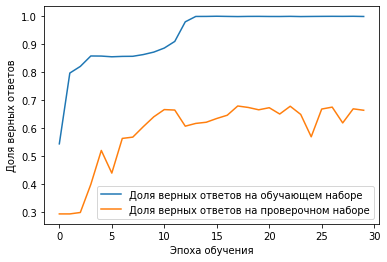

О. Генри распознано 54% сеть считает, что это О. Генри,  Распознано верно
Стругацкие распознано 50% сеть считает, что это Стругацкие,  Распознано верно
Булгаков распознано 49% сеть считает, что это Булгаков,  Распознано верно
Саймак распознано 46% сеть считает, что это Саймак,  Распознано верно
Фрай распознано 80% сеть считает, что это Фрай,  Распознано верно
Брэдбери распознано 85% сеть считает, что это Брэдбери,  Распознано верно
Средний процент распознавания 66%
Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 53s 3ms/sample - loss: 1.1293 - acc: 0.6656 - val_loss: 2.4088 - val_acc: 0.2928
Epoch 2/30
17658/17658 [==============================] - 52s 3ms/sample - loss: 0.4578 - acc: 0.9192 - val_loss: 2.7547 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 52s 3ms/sample - loss: 0.2146 - acc: 0.8917 - val_loss: 2.5654 - val_acc: 0.2970
Epoch 4/30
17658/17658 [==============================] - 51s 3m

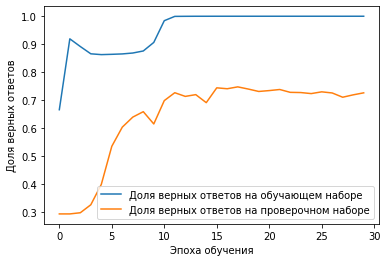

О. Генри распознано 85% сеть считает, что это О. Генри,  Распознано верно
Стругацкие распознано 76% сеть считает, что это Стругацкие,  Распознано верно
Булгаков распознано 35% сеть считает, что это Стругацкие, Распознано неверно
Саймак распознано 73% сеть считает, что это Саймак,  Распознано верно
Фрай распознано 78% сеть считает, что это Фрай,  Распознано верно
Брэдбери распознано 88% сеть считает, что это Брэдбери,  Распознано верно
Средний процент распознавания 72%
Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 202s 11ms/sample - loss: 1.0204 - acc: 0.7175 - val_loss: 3.0167 - val_acc: 0.2928
Epoch 2/30
17658/17658 [==============================] - 195s 11ms/sample - loss: 0.3857 - acc: 0.8928 - val_loss: 2.6957 - val_acc: 0.2928
Epoch 3/30
17658/17658 [==============================] - 196s 11ms/sample - loss: 0.2019 - acc: 0.8804 - val_loss: 2.1532 - val_acc: 0.3017
Epoch 4/30
17658/17658 [==============================]

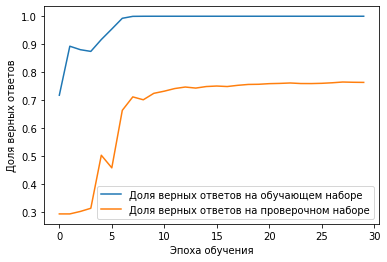

О. Генри распознано 88% сеть считает, что это О. Генри,  Распознано верно
Стругацкие распознано 72% сеть считает, что это Стругацкие,  Распознано верно
Булгаков распознано 57% сеть считает, что это Булгаков,  Распознано верно
Саймак распознано 78% сеть считает, что это Саймак,  Распознано верно
Фрай распознано 72% сеть считает, что это Фрай,  Распознано верно
Брэдбери распознано 89% сеть считает, что это Брэдбери,  Распознано верно
Средний процент распознавания 76%


In [49]:
max_word_count = 50000
emb = [2, 10, 50, 200]
for e in emb:
  modelE = create_net(
      [
       Embedding(max_word_count, e, input_length=x_len), 
       SpatialDropout1D(0.2),
       Flatten(),
       BatchNormalization(),
       Dense(200, activation="relu"), 
       Dropout(0.2),
       BatchNormalization(),
       Dense(6, activation='sigmoid')
      ]
  )
  modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
  history = modelE.fit(x_train, 
                    y_train, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(x_test, y_test))


  plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_acc'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()


  x_test6_classes, x_test6_classes01 = create_test_multi_class(test_word_indexes, x_len, step)
  pred = recognize_multi_class(modelE, x_test6_classes)